# MTG, Easy as A.B.C.
*By Anthony Broussard, Brandon Pimentel, and Charles Zieres*

Our team is using the data from a Magic: the Gathering (MTG) dataset available [HERE](https://www.kaggle.com/datasets/camilonunez/magic-the-gathering-top8-some-decks-and-events/data)

We will develop a predictive model that estimates the win probability of a given deck in tournaments utilizing the deck's total price as a primary feature. In this project, we aim to understand the relationship between deck price and performance, in order to gauge the extent to which monetary investment has an impact on success chances.

Environment setup:

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

Preprocessing:

In [9]:
# Read the cards and price information
df_prices = pd.read_csv('data/cardPrices.csv')
df_cards = pd.read_csv('data/cards.csv')

#combining the cards and pricing information into a single dataframe
df_comb = pd.merge(df_cards, df_prices, on='uuid')



C:\Users\John Kimble\AppData\Local\Temp\ipykernel_12536\1119565522.py:3: DtypeWarning: Columns (3,7,12,16,20,23,25,26,30,31,32,33,35,39,40,41,47,52,53,61,62,66,68) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cards = pd.read_csv('data/cards.csv')


Exploration & visualization:

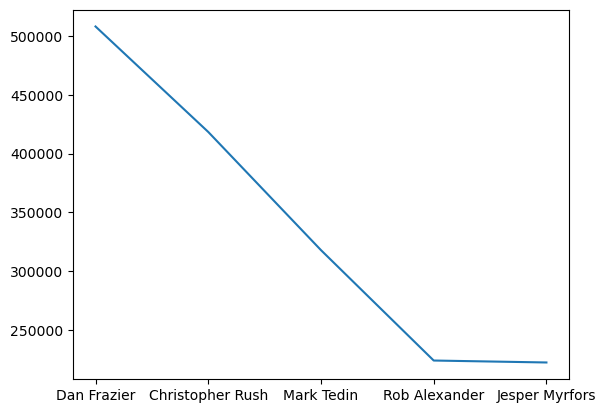

In [10]:
# Generating the sum of all card prices and grouping them by artist. 
artVal = df_comb.groupby(['artist']).price.sum().sort_values(ascending=False)

# Generate a plot based on the top 5 with the highest combined sum
plt.plot(artVal[:5])

Machine Learning Prep: